## Explaination of what we have so far:
1. Scrape flight data from google for 2 flights on the same day with different destinations
2. Automate parsing the data and putting it into a table

## Things we need to do now:
1. Make a list of urls that we want to scrape from and make a for loop that will run through and collect data from each of those urls. These urls should have the same date of April 1st 2018, departure/destinations can vary, but you need to specify the airline. (for some reason, when you put 'any' as an airline it doesn't work)

2. Make a for loop that will collect all this information into a table. Currently, the function 'table' takes each url and makes a table for it, but we need to automate the process so that whenever we run a url through the loop, it continues to append it to the bottom of the table. 

3. Run the scraper at specified intervals. 

4. If we have time, preform some prediction/analysis and maybe some data visualizations. 

In [ ]:
# Reference: https://github.com/hakanmhmd/air-fare-scraper/blob/master/flight_price_scrape.ipynb

In [ ]:
!pip install selenium

In [1]:
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

import requests
import bs4 as bs
import pandas as pd

In [23]:
# f = from this airport (ex. SFO)
# t = to this airport (ex. JFK)
# d = date of flight (ex. yyyy-mm-dd)
# tt = travel type (ex. o for one-way, m for multi-city)
# a = airline (ex. UA for United)
# s = # of stops (ex. 0 for nonstop)

google_flights_url = '''https://www.google.com/flights/#search;f=SFO;t=EWR;d=2018-04-01;tt=o;a=UA;s=0'''
url2 = '''https://www.google.com/flights/#search;f=SFO;t=HNL;d=2018-04-01;r=2018-04-05;tt=o;a=UA;s=0'''


# This should return <Response [200]>
requests.get(google_flights_url)

<Response [200]>

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <link href="https://fonts.googleapis.com/css?family=Roboto:300,400,500,700" rel="stylesheet" type="text/css"/>
  <style type="text/css">
   .gm-style .gm-style-cc span,.gm-style .gm-style-cc a,.gm-style .gm-style-mtc div{font-size:10px}
  </style>
  <style type="text/css">
   @media print {  .gm-style .gmnoprint, .gmnoprint {    display:none  }}@media screen {  .gm-style .gmnoscreen, .gmnoscreen {    display:none  }}
  </style>
  <style type="text/css">
   .gm-style-pbc{transition:opacity ease-in-out;background-color:rgba(0,0,0,0.45);text-align:center}.gm-style-pbt{font-size:22px;color:white;font-family:Roboto,Arial,sans-serif;position:relative;margin:0;top:50%;-webkit-transform:translateY(-50%);-ms-transform:translateY(-50%);transform:translateY(-50%)}
  </style>
  <style>
   .LJV2HGB-eb-j{display:inline-block;padding:0 8px;margin:0;height:27px;min-width:54px;-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box
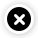
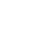
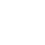
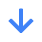
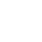
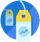

In [24]:
#Trying with Virgin airlines, same day different destination:
requests.get(url2)
driver.get(url2)
soup2 = bs.BeautifulSoup(driver.page_source, 'lxml')
print(soup2.prettify())

In [22]:
# Sources: 
# https://realpython.com/blog/python/headless-selenium-testing-with-python-and-phantomjs/
# https://coderwall.com/p/9jgaeq/set-phantomjs-user-agent-string
# if you have trouble downloading phantomjs:
# https://apple.stackexchange.com/questions/41542/adding-a-new-executable-to-the-path-environment-variable 

dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = (
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94")

driver = webdriver.PhantomJS(desired_capabilities=dcap)
driver.get(google_flights_url)

In [25]:
# Read in source.content to beautifulsoup 
# beautifulsoup can parse (extract specific information) HTML code

soup = bs.BeautifulSoup(driver.page_source, 'lxml') 
# we pass in the source content and choose a parser

# features specifies what type of code we are parsing, 
# here 'lxml' specifies an HTML parser

In [26]:
# If you click into the printed text and then CTRL+F "$2",
# you can see that it has the prices so the webscraping works
#print(soup.prettify())

In [27]:
# the price is between <div class="LJV2HGB-d-Ab">
prices = []
for price in soup.findAll('div', 'LJV2HGB-d-Ab'):
    prices.append(price.text.replace('$','').replace(',',''))
    
prices

['669', '669', '669', '669', '669']

In [35]:
# Time of departure/arrival is divided by <div class="LJV2HGB-d-Zb">
times = soup.findAll('div', 'LJV2HGB-d-Zb')
for i in times:
    print(i.text.split(' – '))
    

['9:00 AM', '11:12 AM']
['12:50 PM', '3:10 PM']
['4:05 PM', '6:33 PM']
['7:40 AM', '10:28 AM']
['7:00 PM', '9:40 PM']


In [ ]:
# Length of the flight is divided by <div class="LJV2HGB-d-E">
length = soup.findAll('div', 'LJV2HGB-d-E')
length

In [ ]:
# the number of stops is divided by <div class="LJV2HGB-d-Qb">
stops = soup.findAll('div', 'LJV2HGB-d-Qb')
stops

In [ ]:
#the airline is divided by <div class="LJV2HGB-d-j">
airline = soup.findAll('div','LJV2HGB-d-j')
airline

In [ ]:
# Now that we know where to find the necessary information,
# we need to automate cleaning the output and put it into a DF
airline=[]
for airl in soup.findAll('div','LJV2HGB-d-j'):
    airline.append(airl.text)
    
airline

In [ ]:
# Parsing for SFO to HNL is 
#price is divided by <div class="LJV2HGB-d-Ab">
#airline is <div class="LJV2HGB-d-j">
#I'm just gonna assume everything else is the same 

In [78]:
#Can you help split the departure and arrivals time into different lists?
#will also need additional columns for departure and arrival airports
#but we'll deal with that when we make the list of airports we want to use
def table(soup):
    """Creates a table with columns for airline, price, duration, 
    number of stops (or nonstop), departures and arrivals"""
    airlines = []
    for airline in soup.findAll('div','LJV2HGB-d-j'):
        airlines.append(airline.text)
    
    size = len(soup.findAll('div','LJV2HGB-d-j'))
    departure_city = []
    arrival_city = []
    date = []
    for i in range(size):
        departure_index = google_flights_url.find("f=")
        departure_city.append(google_flights_url[departure_index + 2: departure_index + 5])
        arrival_index = google_flights_url.find("t=")
        arrival_city.append(google_flights_url[arrival_index + 2: arrival_index + 5])
        date_index = google_flights_url.find("d=")
        date.append(google_flights_url[date_index + 2: date_index + 12])

    departure_times = []
    arrival_times = []
    for time in soup.findAll('div', 'LJV2HGB-d-Zb'):
        time = time.text.split(' – ')
        departure_times.append(time[0])
        arrival_times.append(time[1])
        
    prices = []
    for price in soup.findAll('div', 'LJV2HGB-d-Ab'):
        prices.append(price.text.replace('$','').replace(',',''))
    
    duration = []
    for time in soup.findAll('div', 'LJV2HGB-d-E'):
        duration.append(time.text)
        
    stops = []
    for stop in soup.findAll('div', 'LJV2HGB-d-Qb'):
        stops.append(stop.text)
    
    tbl = pd.DataFrame(list(zip(airlines,departure_city,arrival_city,date,departure_times,arrival_times,prices,duration,stops)),
                      columns = ['Airline', 'Departure City', 'Arrival City', 'Date', 'Departure Time', 'Arrival Time', 'Price', 'Duration', 'Stops'])

    return tbl
   
    

In [80]:
table(soup2).to_csv('1.csv')

In [79]:
table(soup).to_csv('2.csv')

In [15]:
def google_flights_to_pandas(google_flights_url):
    '''
    Input:
        google_flights_url (string): Google Flights url to scrape (see example below)
    Example Input:
        https://www.google.com/flights/#search;f=SFO;t=EWR;d=2018-04-01;tt=o;a=UA;s=0
        f = from this airport (ex. SFO)
        t = to this airport (ex. JFK)
        d = date of flight (ex. yyyy-mm-dd)
        tt = travel type (ex. o for one-way, m for multi-city)
        a = airline (ex. UA for United)
        s = # of stops (ex. 0 for nonstop)
    Output:
        google_flights_pd (pandas DataFrame): Airfare information including 
            date, airline, price, duration, and number of stops
    '''
    
    dcap = dict(DesiredCapabilities.PHANTOMJS)
    dcap["phantomjs.page.settings.userAgent"] = (
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94")
    driver = webdriver.PhantomJS(desired_capabilities=dcap)
    driver.get(google_flights_url)
    
    # Read in source.content to beautifulsoup 
    # we pass in the source content and choose a parser
    soup = bs.BeautifulSoup(driver.page_source, 'lxml')
    print(soup.prettify())

    # the airline is divided by <div class="LJV2HGB-d-j">
    airlines = []
    for airline in soup.findAll('div','LJV2HGB-d-j'):
        airlines.append(airline.text)
    
    # the price is between <div class="LJV2HGB-d-Ab">
    prices = []
    for price in soup.findAll('div', 'LJV2HGB-d-Ab'):
        prices.append(price.text.replace('$','').replace(',',''))
    
    # Length of the flight is divided by <div class="LJV2HGB-d-E">
    duration = []
    for time in soup.findAll('div', 'LJV2HGB-d-E'):
        duration.append(time.text)
       
    # the number of stops is divided by <div class="LJV2HGB-d-Qb">
    stops = []
    for stop in soup.findAll('div', 'LJV2HGB-d-Qb'):
        stops.append(stop.text)
    
    tbl = pd.DataFrame(list(zip(airlines,prices,duration,stops)),
                      columns = ['Airline', 'Price', 'Duration', 'Stops'])

    return tbl

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <style>
   .LJV2HGB-eb-j{display:inline-block;padding:0 8px;margin:0;height:27px;min-width:54px;-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box;font-size:11px;font-weight:bold;text-align:center;border-width:1px;border-style:solid;-webkit-border-radius:2px;-moz-border-radius:2px;border-radius:2px;cursor:default;-webkit-user-select:none;-moz-user-select:none;-webkit-transition:all .218s;-moz-transition:all .218s;-o-transition:all .218s;transition:all .218s;-webkit-transition:border-width 0;-moz-transition:border-width 0;-o-transition:border-width 0;transition:border-width 0;-webkit-transition:margin 0;-moz-transition:margin 0;-o-transition:margin 0;transition:margin 0}.LJV2HGB-eb-j .LJV2HGB-eb-b{height:27px;line-height:27px}.LJV2HGB-eb-j .LJV2HGB-eb-i{display:inline-block;height:27px;background-repeat:no-repeat;background-position:center}.LJV2HGB-eb-j.LJV2HGB-eb-o.LJV2HGB-eb-f{-webkit-border-radius:2px 0 0 2p
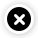
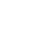
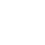

In [16]:
url_list = []
# url_list.append("https://www.google.com/flights/#search;f=SFO;t=EWR;d=2018-04-01;tt=o;a=UA;s=0")
url_list.append("https://www.google.com/flights/#search;f=SFO;t=HNL;d=2018-04-01;tt=o;a=UA;s=0")

for url in url_list:
    assert requests.get(url).status_code == 200
    data = google_flights_to_pandas(url)
    print(data)